# Exploratory Data Analysis.

#### Purpose:
The purpose of this script is to gain an initial understanding of the dataset by identifying patterns, detecting anomalies, and evaluating relationships between key variables. This helps ensure data quality, guides preprocessing decisions, and provides insights that support later modeling steps.

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Import data
file_path = './ocean_out/telemetry_with_era5_ocean_density.parquet'
df = pd.read_parquet(file_path)

In [2]:
# Shape

df.describe()

,Draught_A_m,Draught_F_m,Latitude_deg,Longitude_deg,SpeedOverGround_kn,HeadingTrue_deg,SpeedThroughWater_kn,WindAngleRelative_deg,WindSpeedRelative_m_s,ShaftPower_kW,...,mwd,mwp,swh,u10,v10,uo,vo,thetao,so,rho_surface
count,762608.000000,768277.000000,780044.000000,780042.000000,780018.000000,779907.000000,779815.000000,780051.000000,780052.000000,770503.000000,...,755246.000000,755246.000000,755246.000000,778311.000000,778311.000000,765161.000000,765161.000000,765161.000000,765161.000000,765161.000000
mean,9.825399,10.218692,14.419474,29.240550,14.265520,-13.949442,14.183424,186.707788,10.321489,6216.327066,...,195.377563,7.709260,1.866003,-0.184172,0.367724,-0.018048,-0.006229,20.907717,34.627216,1023.897433
std,0.654436,0.964725,28.883128,81.668870,4.182147,99.587904,4.092927,132.955030,5.561492,2922.164310,...,91.387230,2.405658,0.948546,5.147375,5.013920,0.231553,0.210935,7.057789,2.458470,2.372742
min,6.096667,6.443333,-39.208003,-179.996378,0.000000,-180.000000,0.000000,0.000000,0.083333,0.000000,...,0.078776,1.645883,0.033102,-12.574478,-14.543690,-1.493571,-1.561181,-0.499829,0.393989,997.620033
25%,9.615000,9.765000,-11.820832,-11.969328,13.530167,-104.799998,13.688333,49.833333,5.666667,4874.750000,...,143.708710,5.856173,1.196856,-4.182126,-3.267227,-0.126790,-0.102672,16.451143,33.769478,1022.524134
50%,10.015000,10.510000,19.260728,11.704305,15.315917,-27.483334,15.180000,215.200000,9.833333,6277.454545,...,198.492706,7.950088,1.797317,-0.715772,0.620499,-0.014994,-0.007061,21.593592,35.127613,1024.370565
75%,10.300000,10.976667,37.505045,104.581098,16.751500,73.583333,16.593334,318.200000,14.620000,8253.000000,...,265.370148,9.456817,2.507492,3.586868,4.188019,0.094702,0.091318,27.166595,35.767975,1025.580424
max,11.260000,12.460000,58.751394,179.994734,24.647334,180.000000,20.656667,359.000000,33.860000,13030.250000,...,359.977875,14.780456,5.617629,17.731903,17.251947,1.784655,1.259612,32.436958,43.236469,1030.980171


<Axes: >

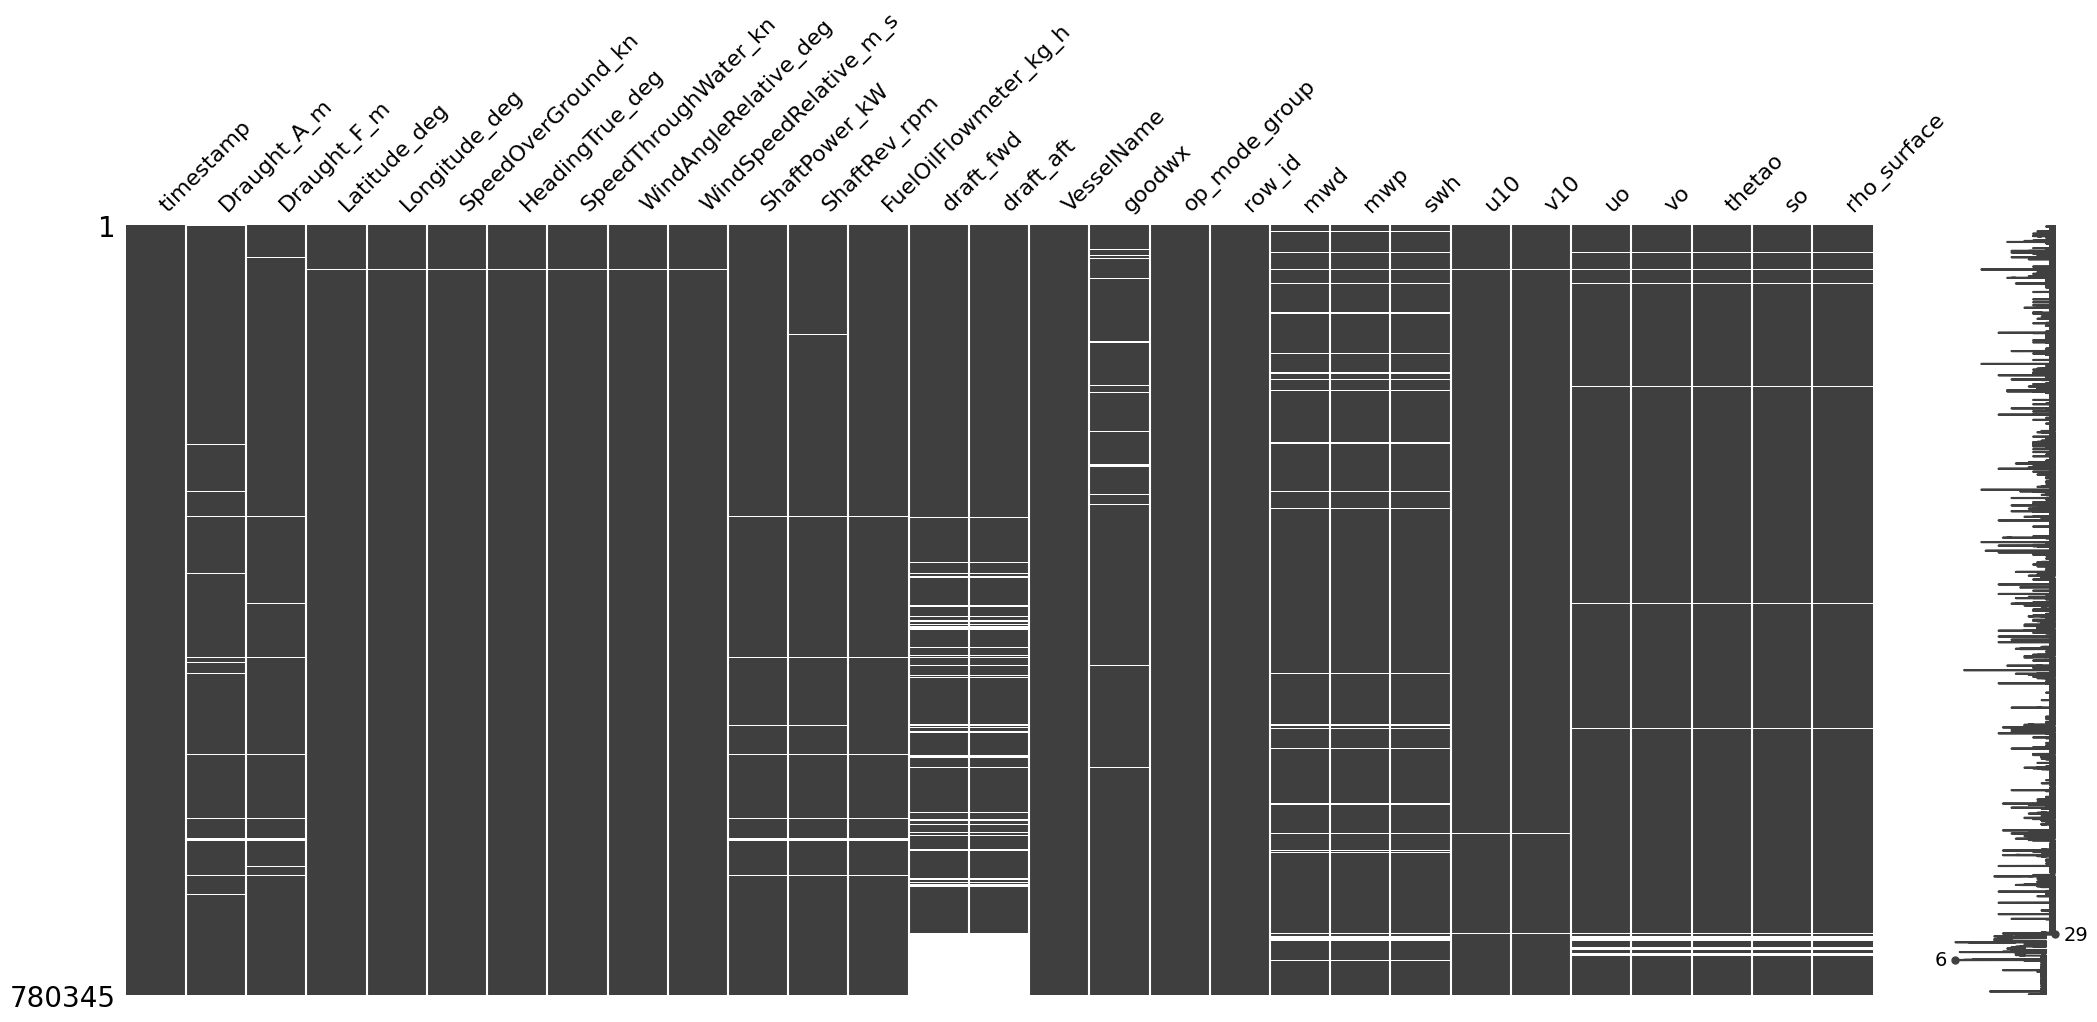

In [3]:
# Missing Data Visualization
msno.matrix(df)

Alot of NaNs in the different columns.

#### Summary statistics
This helps detect unrealistic values.

In [4]:
df.describe()

,Draught_A_m,Draught_F_m,Latitude_deg,Longitude_deg,SpeedOverGround_kn,HeadingTrue_deg,SpeedThroughWater_kn,WindAngleRelative_deg,WindSpeedRelative_m_s,ShaftPower_kW,...,mwd,mwp,swh,u10,v10,uo,vo,thetao,so,rho_surface
count,762608.000000,768277.000000,780044.000000,780042.000000,780018.000000,779907.000000,779815.000000,780051.000000,780052.000000,770503.000000,...,755246.000000,755246.000000,755246.000000,778311.000000,778311.000000,765161.000000,765161.000000,765161.000000,765161.000000,765161.000000
mean,9.825399,10.218692,14.419474,29.240550,14.265520,-13.949442,14.183424,186.707788,10.321489,6216.327066,...,195.377563,7.709260,1.866003,-0.184172,0.367724,-0.018048,-0.006229,20.907717,34.627216,1023.897433
std,0.654436,0.964725,28.883128,81.668870,4.182147,99.587904,4.092927,132.955030,5.561492,2922.164310,...,91.387230,2.405658,0.948546,5.147375,5.013920,0.231553,0.210935,7.057789,2.458470,2.372742
min,6.096667,6.443333,-39.208003,-179.996378,0.000000,-180.000000,0.000000,0.000000,0.083333,0.000000,...,0.078776,1.645883,0.033102,-12.574478,-14.543690,-1.493571,-1.561181,-0.499829,0.393989,997.620033
25%,9.615000,9.765000,-11.820832,-11.969328,13.530167,-104.799998,13.688333,49.833333,5.666667,4874.750000,...,143.708710,5.856173,1.196856,-4.182126,-3.267227,-0.126790,-0.102672,16.451143,33.769478,1022.524134
50%,10.015000,10.510000,19.260728,11.704305,15.315917,-27.483334,15.180000,215.200000,9.833333,6277.454545,...,198.492706,7.950088,1.797317,-0.715772,0.620499,-0.014994,-0.007061,21.593592,35.127613,1024.370565
75%,10.300000,10.976667,37.505045,104.581098,16.751500,73.583333,16.593334,318.200000,14.620000,8253.000000,...,265.370148,9.456817,2.507492,3.586868,4.188019,0.094702,0.091318,27.166595,35.767975,1025.580424
max,11.260000,12.460000,58.751394,179.994734,24.647334,180.000000,20.656667,359.000000,33.860000,13030.250000,...,359.977875,14.780456,5.617629,17.731903,17.251947,1.784655,1.259612,32.436958,43.236469,1030.980171


#### Value ranges and Distributions

Looking for unrealistic values and ranges of the different parameteres

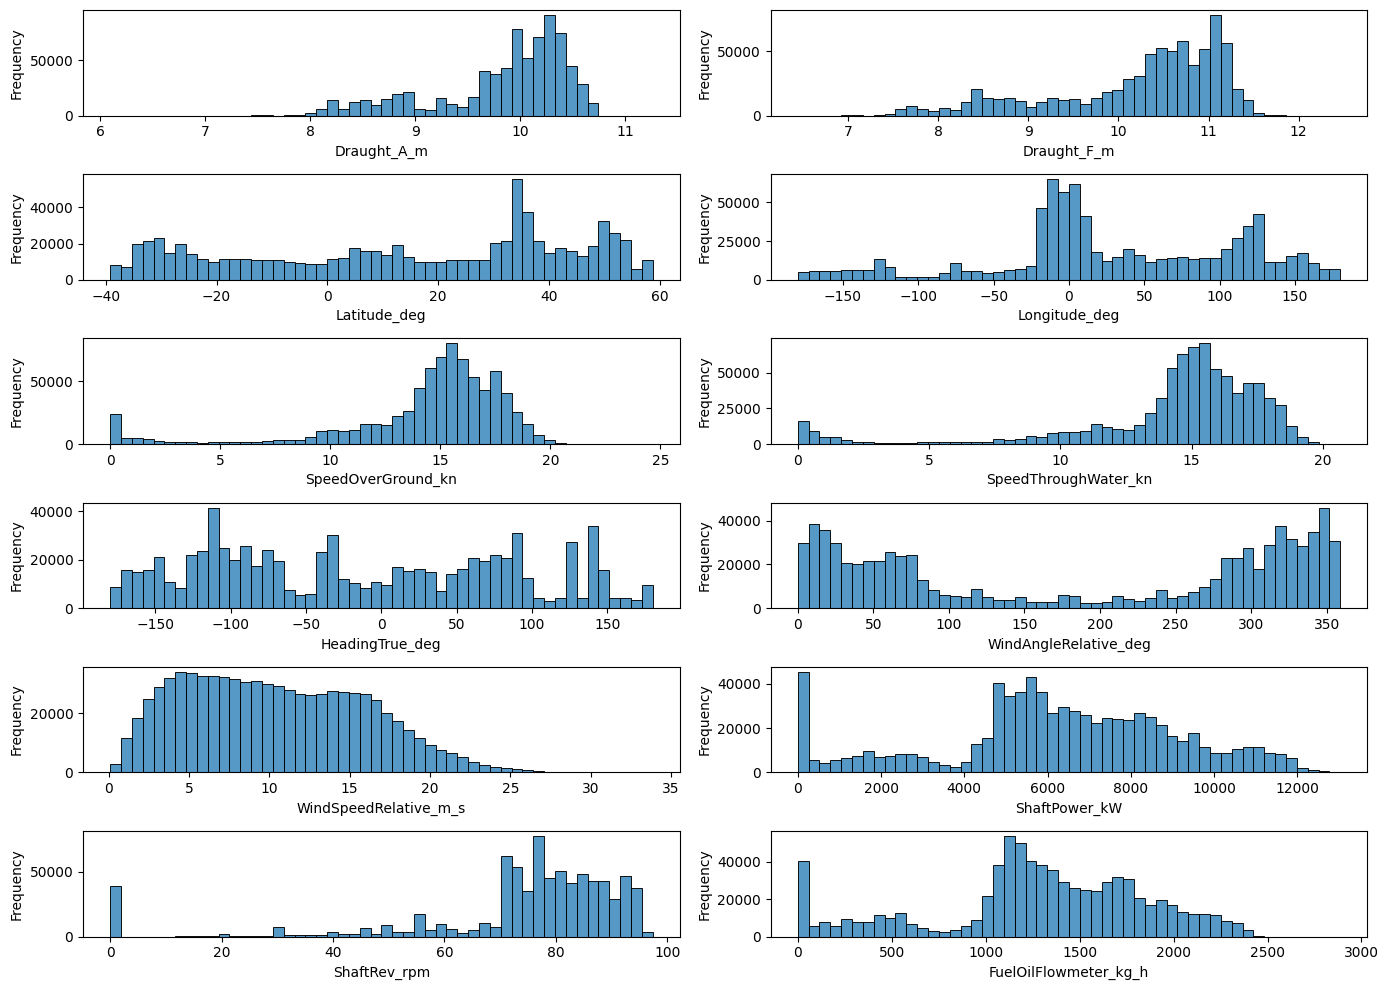

In [5]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


columns = [
    "Draught_A_m",
    "Draught_F_m",
    "Latitude_deg",
    "Longitude_deg",
    "SpeedOverGround_kn",
    "SpeedThroughWater_kn",
    "HeadingTrue_deg",
    "WindAngleRelative_deg",
    "WindSpeedRelative_m_s",
    "ShaftPower_kW",
    "ShaftRev_rpm",
    "FuelOilFlowmeter_kg_h",
    
]


def plot_columns_distribution(
    df: pd.DataFrame,
    columns: list[str] | None = None,
    kind: str = "hist",
    bins: int = 50,
    figsize: tuple = (14, 10),
    kde: bool = True,
    color: str | None = None,
    cols_per_row: int = 3
):
    # If no columns supplied → use all columns
    if columns is None:
        columns = list(df.columns)

    # Validate columns
    missing = [c for c in columns if c not in df.columns]
    if missing:
        raise KeyError(f"Columns not found in DataFrame: {missing}")

    n = len(columns)
    rows = math.ceil(n / cols_per_row)

    fig, axes = plt.subplots(rows, cols_per_row, figsize=figsize)
    axes = axes.flatten()  # flatten in case of multi-row grid

    for ax, column in zip(axes, columns):
        series = df[column].dropna()

        if pd.api.types.is_numeric_dtype(series):
            # numeric column
            if kind == "kde":
                sns.kdeplot(series, ax=ax, color=color, fill=True)
            else:
                sns.histplot(series, bins=bins, kde=kde, ax=ax, color=color)
            ax.set_xlabel(column)
            ax.set_ylabel("Frequency")
           

        else:
            # categorical (value counts)
            vc = series.value_counts().iloc[:50]
            sns.barplot(x=vc.values, y=vc.index, ax=ax, color=color)
            ax.set_xlabel("Count")
            ax.set_ylabel(column)
           

    # Turn off unused axes (if any)
    for i in range(len(columns), len(axes)):
        axes[i].set_axis_off()

    plt.tight_layout()
    plt.show()
    return fig, axes



fig, axes = plot_columns_distribution(
    df,
    columns,
    cols_per_row=2,
    kind="hist",
    kde=False
)

#### Correlation between different parameters

<Axes: >

<Figure size 1800x1000 with 0 Axes>

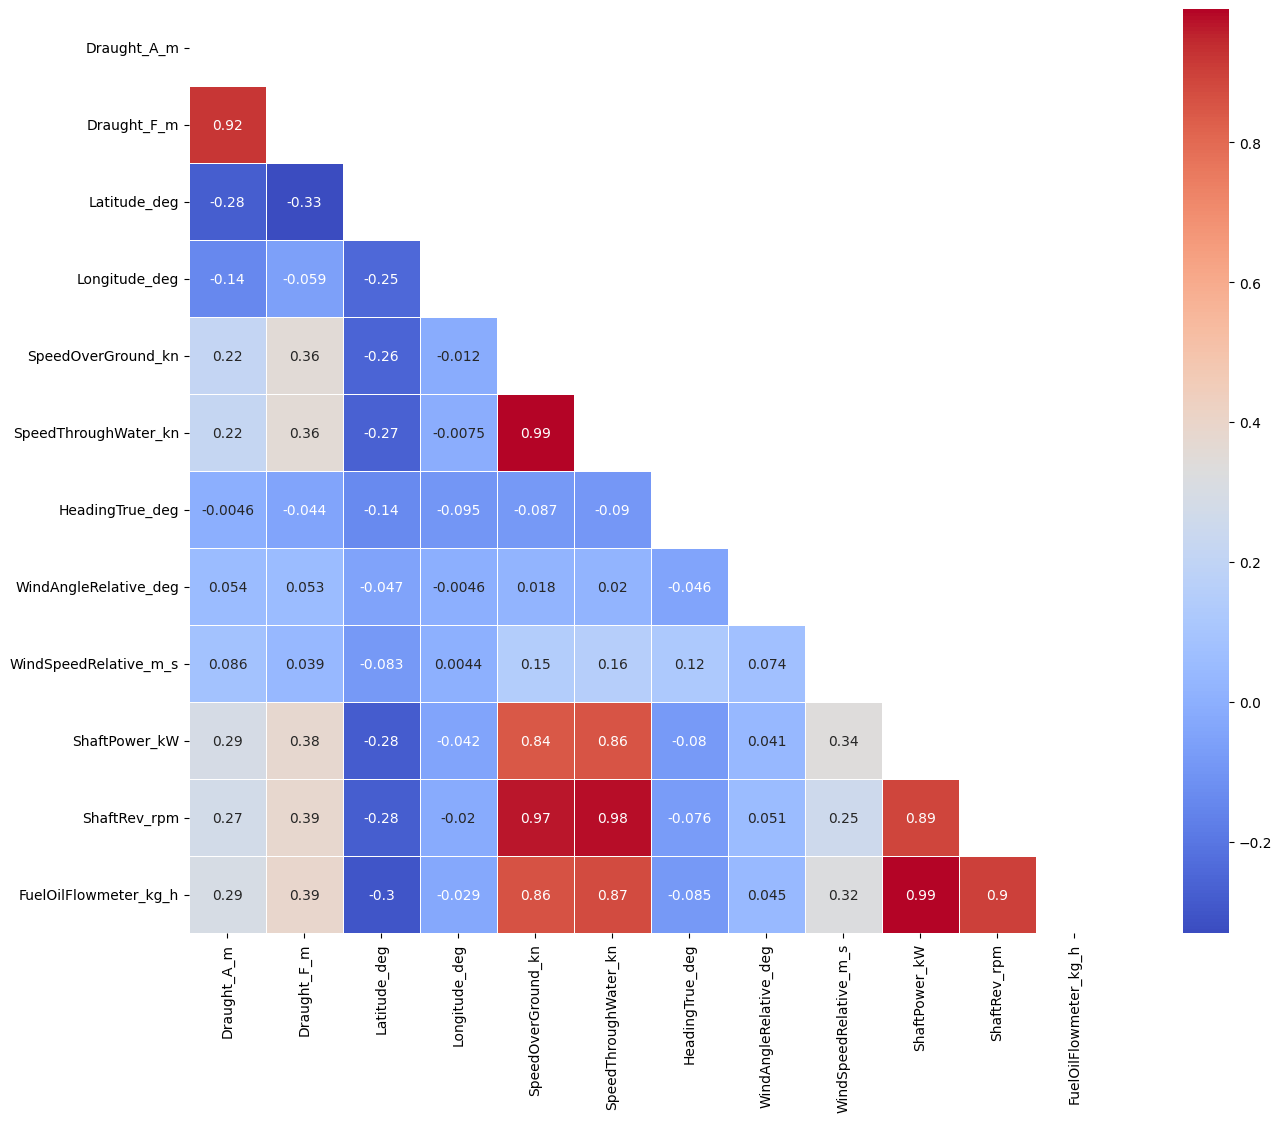

In [6]:
plt.figure(figsize=(18, 10))   # ← wider figure (increase numbers as needed)

df_sel = df[columns]

corr = df_sel.corr(numeric_only=True)

# Create mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(18, 12))

sns.heatmap(
    corr,
    mask=mask,          # ← hides upper triangle
    cmap="coolwarm",
    annot=True,
    square=True,
    linewidths=0.5
)


SpeedThroughWater_kn and SpeedOverGround_kn – nearly identical vessel speed metrics.\
ShaftRev_rpm and SpeedThroughWater_kn / SpeedOverGround_kn – higher RPM directly increases vessel speed.\
FuelOilFlowmeter_kg_h and ShaftRev_rpm / ShaftPower_kW – fuel consumption strongly tied to engine RPM and power output.\
ShaftPower_kW and ShaftRev_rpm – engine power increases proportionally with RPM.\
Draught_A_m and Draught_F_m – forward and aft draught change together.

#### Relationships

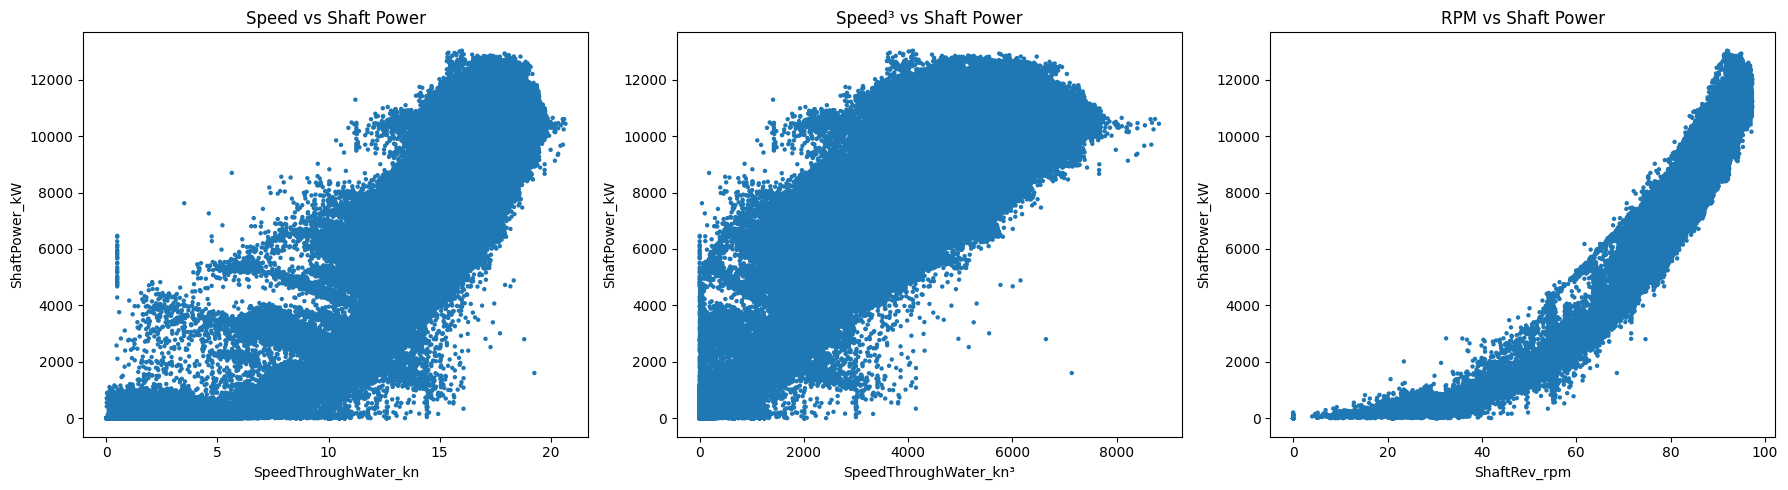

In [7]:


def plot_power_relationships(df):
    # define columns
    speed_col   = "SpeedThroughWater_kn"
    rpm_col     = "ShaftRev_rpm"
    power_col   = "ShaftPower_kW"

    # create helper columns
    df_plot = df[[speed_col, rpm_col, power_col]].dropna().copy()
    df_plot["speed_cubed"] = df_plot[speed_col] ** 3

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    scatter_kwargs = dict(s=10, edgecolor="none")

    # 1) speed vs shaft power
    sns.scatterplot(
        data=df_plot, x=speed_col, y=power_col, ax=axes[0], **scatter_kwargs
    )
    axes[0].set_title("Speed vs Shaft Power")
    axes[0].set_xlabel("SpeedThroughWater_kn")
    axes[0].set_ylabel("ShaftPower_kW")

    # 2) speed^3 vs shaft power
    sns.scatterplot(
        data=df_plot, x="speed_cubed", y=power_col, ax=axes[1], **scatter_kwargs
    )
    axes[1].set_title("Speed³ vs Shaft Power")
    axes[1].set_xlabel("SpeedThroughWater_kn³")
    axes[1].set_ylabel("ShaftPower_kW")

    # 3) rpm vs shaft power
    sns.scatterplot(
        data=df_plot, x=rpm_col, y=power_col, ax=axes[2], **scatter_kwargs
    )
    axes[2].set_title("RPM vs Shaft Power")
    axes[2].set_xlabel("ShaftRev_rpm")
    axes[2].set_ylabel("ShaftPower_kW")

    plt.tight_layout()
    plt.show()

# call it:
plot_power_relationships(df)

